In [1]:

!pwd
#/tf/capstone2/src

/tf/capstone2/data/app/breast-cancer-cnn/notebooks


In [2]:
cd ..

/tf/capstone2/data/app/breast-cancer-cnn


In [3]:
cd src/

/tf/capstone2/data/app/breast-cancer-cnn/src


In [132]:
from image_pipeline import *
from image_convolv import *
from bc_plotting import *
from bc import *

In [133]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel 
from skimage.feature._canny import canny
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle
from skimage.transform import resize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pdb

In [8]:
# Goal is to isolate holdout data and load pre-build model to run evaluate methods
# and get plots looking nice


In [6]:
#root_dir = '../data/BreaKHis_v1/histology_slides/breast'
#image_size = (153, 234, 3) # (456, 700, 3) # ( 153, 234, 3)

#ip = read_images(root_dir, ['200X'])
#ip.resize(shape = image_size)
brief_mode = False
ip = run_pipeline(brief_mode=False) # sets ip images_filename_list, and images_list

first image shape (460, 700, 3)
first names entry SOB_B_A-14-22549AB-200-001.png
images_list should have list of 2013 patients x images, filenames of shape 460 
first image shape (460, 700, 3)
images_filename_list should have list of 2013 patients * images
first names entry SOB_B_A-14-22549AB-200-001.png
{'tumor_class': 'B', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'year': '14', 'slide_id': '22549AB', 'mag': '200', 'seq': '001', 'image_size': (460, 700, 3)}


In [7]:
# Turns data into arrays
ip.vectorize() # sets ip features and tumor_class_vector

images_list len 2013 
shape of np array converted images_list going in (2013, 153, 234, 3)
features shape (2013, 153, 234, 3)
attribs (dict) len 2013
{'tumor_class': 'B', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'year': '14', 'slide_id': '22549AB', 'mag': '200', 'seq': '001', 'image_size': (460, 700, 3)}
{'tumor_class': 'B', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'year': '14', 'slide_id': '22549AB', 'mag': '200', 'seq': '002', 'image_size': (460, 700, 3)}
{'tumor_class': 'B', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'year': '14', 'slide_id': '22549AB', 'mag': '200', 'seq': '003', 'image_size': (460, 700, 3)}
{'tumor_class': 'B', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'year': '14', 'slide_id': '22549AB', 'mag': '200', 'seq': '004', 'image_size': (460, 700, 3)}
tumor_class vector num malig 1390 out of 2013 samples
tumor_class vector looks like [0 0 0 ... 1 1 1]
number of distinct patients: 81


In [9]:
# shuffle! 
X, y, groups, filename_list = shuffle_all(ip.features, ip.tumor_class_vector, ip.group_list, ip.images_filename_list)

In [10]:
num_diffs = test_integrities(y, groups, filename_list, ip.images_attributes)

len and y: (2013,) [1 0 1 ... 0 0 1]


In [11]:
num_diffs

0

In [10]:
# check out data
ip.images_attributes

images_list len 82 
shape of np array converted images_list going in (82, 153, 234, 3)
features shape (82, 153, 234, 3)
attribs (dict) len 82
{'seq': '001', 'mag': '200', 'image_size': (460, 700, 3), 'year': '14', 'slide_id': '13412', 'biopsy_procedure': 'SOB', 'tumor_type': 'DC', 'tumor_class': 'M'}
{'seq': '001', 'mag': '200', 'image_size': (460, 700, 3), 'year': '14', 'slide_id': '17614', 'biopsy_procedure': 'SOB', 'tumor_type': 'DC', 'tumor_class': 'M'}
{'seq': '001', 'mag': '200', 'image_size': (460, 700, 3), 'year': '14', 'slide_id': '15275', 'biopsy_procedure': 'SOB', 'tumor_type': 'TA', 'tumor_class': 'B'}
{'seq': '001', 'mag': '200', 'image_size': (460, 700, 3), 'year': '14', 'slide_id': '22549CD', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'tumor_class': 'B'}
{'seq': '002', 'mag': '200', 'image_size': (460, 700, 3), 'year': '14', 'slide_id': '6241', 'biopsy_procedure': 'SOB', 'tumor_type': 'DC', 'tumor_class': 'M'}
{'seq': '001', 'mag': '200', 'image_size': (460, 700, 3), 

{'SOB_B_A-14-22549AB-200-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (460, 700, 3),
  'mag': '200',
  'seq': '001',
  'slide_id': '22549AB',
  'tumor_class': 'B',
  'tumor_type': 'A',
  'year': '14'},
 'SOB_B_A-14-22549CD-200-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (460, 700, 3),
  'mag': '200',
  'seq': '001',
  'slide_id': '22549CD',
  'tumor_class': 'B',
  'tumor_type': 'A',
  'year': '14'},
 'SOB_B_A-14-22549G-200-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (460, 700, 3),
  'mag': '200',
  'seq': '001',
  'slide_id': '22549G',
  'tumor_class': 'B',
  'tumor_type': 'A',
  'year': '14'},
 'SOB_B_A-14-29960CD-200-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (460, 700, 3),
  'mag': '200',
  'seq': '001',
  'slide_id': '29960CD',
  'tumor_class': 'B',
  'tumor_type': 'A',
  'year': '14'},
 'SOB_B_F-14-14134-200-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (460, 700, 3),
  'mag': '200',
  'seq': '001',
  'slide_id': '14134',
  'tumor_cl

In [12]:
# Get holdout data

In [14]:
X_train, X_holdout, y_train, y_holdout, groups_tr, groups_val, filename_tr, filename_val  = \
    train_holdouts_split_by_group(X, y, \
    groups=groups, filename_list=filename_list, holdout_pct=0.1)


in train_holdouts_split_by_group, shapes of X and y, groups, and fns (2013, 153, 234, 3) (2013,) 2013 2013
groups: ['5695', '21998CD', '16456', '20636', '16188', '22549CD', '17915', '15570', '25197', '14015', '21978AB', '15792', '14134E', '2773', '19440', '17915', '3411F', '16716', '18650', '21998AB', '9461', '21998AB', '2523', '16196', '2523', '15570', '13413', '17901', '16184CD', '12312', '3909', '15570', '19854C', '29960CD', '9133', '9146', '9146', '4364', '15687B', '15570C', '15704', '2773', '16716', '2773', '3909', '16184', '12465', '19979C', '23222AB', '16184']
(1769, 153, 234, 3) (244, 153, 234, 3)
1769 244
sample holdout filenames: ['SOB_B_A-14-22549CD-200-020.png', 'SOB_B_F-14-25197-200-049.png', 'SOB_M_LC-14-16196-200-017.png', 'SOB_M_DC-14-4364-200-012.png', 'SOB_B_TA-14-16184-200-016.png', 'SOB_B_TA-14-16184-200-004.png', 'SOB_M_DC-14-5694-200-013.png', 'SOB_B_A-14-22549CD-200-018.png', 'SOB_M_DC-14-13993-200-004.png', 'SOB_B_TA-14-16184-200-022.png', 'SOB_B_A-14-22549CD-20

In [15]:
y_holdout.shape

(244,)

In [134]:
# CNN without building
cnn = CNN()
model = keras.models.load_model('../models/saved_model_adadelta.h5')
cnn.model = model
type(model)


tensorflow.python.keras.engine.sequential.Sequential

In [138]:
print(cnn.model.history)

None


In [136]:
y_proba = cnn.model.predict(X_holdout)
y_proba



array([[0.90861005, 0.0913899 ],
       [0.15977675, 0.8402233 ],
       [0.09850858, 0.90149134],
       [0.24866934, 0.7513306 ],
       [0.65465075, 0.34534928],
       [0.19792604, 0.8020739 ],
       [0.08043846, 0.9195615 ],
       [0.94126093, 0.05873905],
       [0.16645844, 0.8335416 ],
       [0.8950178 , 0.10498217],
       [0.91980845, 0.08019151],
       [0.2255086 , 0.7744914 ],
       [0.04942041, 0.9505796 ],
       [0.13102368, 0.8689763 ],
       [0.04913963, 0.9508604 ],
       [0.2644939 , 0.73550606],
       [0.02700421, 0.97299576],
       [0.1386552 , 0.8613448 ],
       [0.36591318, 0.6340868 ],
       [0.85280293, 0.14719705],
       [0.14582866, 0.85417134],
       [0.26305827, 0.73694175],
       [0.02124001, 0.97875994],
       [0.27114952, 0.7288505 ],
       [0.13076398, 0.869236  ],
       [0.16153957, 0.83846045],
       [0.20876512, 0.79123485],
       [0.11033005, 0.88966995],
       [0.26070777, 0.7392922 ],
       [0.10893417, 0.89106584],
       [0.

In [148]:
# round to 1 decimal place
y_proba2 = np.round(y_proba, 2)
y_proba2

array([[0.91, 0.09],
       [0.16, 0.84],
       [0.1 , 0.9 ],
       [0.25, 0.75],
       [0.65, 0.35],
       [0.2 , 0.8 ],
       [0.08, 0.92],
       [0.94, 0.06],
       [0.17, 0.83],
       [0.9 , 0.1 ],
       [0.92, 0.08],
       [0.23, 0.77],
       [0.05, 0.95],
       [0.13, 0.87],
       [0.05, 0.95],
       [0.26, 0.74],
       [0.03, 0.97],
       [0.14, 0.86],
       [0.37, 0.63],
       [0.85, 0.15],
       [0.15, 0.85],
       [0.26, 0.74],
       [0.02, 0.98],
       [0.27, 0.73],
       [0.13, 0.87],
       [0.16, 0.84],
       [0.21, 0.79],
       [0.11, 0.89],
       [0.26, 0.74],
       [0.11, 0.89],
       [0.26, 0.74],
       [0.11, 0.89],
       [0.91, 0.09],
       [0.19, 0.81],
       [0.9 , 0.1 ],
       [0.57, 0.43],
       [0.05, 0.95],
       [0.95, 0.05],
       [0.06, 0.94],
       [0.11, 0.89],
       [0.12, 0.88],
       [0.04, 0.96],
       [0.21, 0.79],
       [0.04, 0.96],
       [0.2 , 0.8 ],
       [0.9 , 0.1 ],
       [0.11, 0.89],
       [0.54,

In [149]:
len(y_proba[:,0])
# This gets the index pos of the max
y_hat = np.argmax(y_proba2, axis=-1).reshape(-1,1)

# i also want the prob.
#y_proba2[[y_hat]]
np.indices

# predicted class 
y_hat



array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [150]:
print ('{} predicted M out of {}'.format(sum(y_hat), len(y_hat)))


print ('{} actual M out of {}'.format(sum(y_holdout), len(y_holdout)))
len(y_holdout)

[176] predicted M out of 244
117 actual M out of 244


244

In [151]:
#arr = [[1, 2], [3, 4]]
#mask = [[1],[0]]
 

# There must be a numpy way

In [152]:
def mask_2D_by_col(arr2D, arrColToKeep):
    # There must be an array-wise operation to do this but 
    keep = []
    for i, item in enumerate(arr2D):
        #print (item)
        #print (arrColToKeep[i][0])
        #print (arr2D[i][arrColToKeep[i][0]])
        keep.append([arr2D[i][arrColToKeep[i][0]]])
    return keep   
    

In [153]:
winner_proba = mask_2D_by_col(y_proba2, y_hat)
winner_proba

[[0.91],
 [0.84],
 [0.9],
 [0.75],
 [0.65],
 [0.8],
 [0.92],
 [0.94],
 [0.83],
 [0.9],
 [0.92],
 [0.77],
 [0.95],
 [0.87],
 [0.95],
 [0.74],
 [0.97],
 [0.86],
 [0.63],
 [0.85],
 [0.85],
 [0.74],
 [0.98],
 [0.73],
 [0.87],
 [0.84],
 [0.79],
 [0.89],
 [0.74],
 [0.89],
 [0.74],
 [0.89],
 [0.91],
 [0.81],
 [0.9],
 [0.57],
 [0.95],
 [0.95],
 [0.94],
 [0.89],
 [0.88],
 [0.96],
 [0.79],
 [0.96],
 [0.8],
 [0.9],
 [0.89],
 [0.54],
 [0.9],
 [0.95],
 [0.75],
 [0.76],
 [0.96],
 [0.91],
 [0.72],
 [0.6],
 [0.7],
 [0.95],
 [0.87],
 [0.85],
 [0.57],
 [0.79],
 [0.91],
 [0.94],
 [0.97],
 [0.94],
 [0.82],
 [0.79],
 [0.89],
 [0.91],
 [0.81],
 [0.93],
 [0.88],
 [0.92],
 [0.91],
 [0.73],
 [0.82],
 [0.68],
 [0.8],
 [0.88],
 [0.76],
 [0.79],
 [0.81],
 [0.7],
 [0.97],
 [0.71],
 [0.88],
 [0.79],
 [0.96],
 [0.92],
 [0.89],
 [0.84],
 [0.92],
 [0.7],
 [0.69],
 [0.92],
 [0.86],
 [0.97],
 [0.82],
 [0.64],
 [0.86],
 [0.76],
 [0.84],
 [0.84],
 [0.87],
 [0.82],
 [0.9],
 [0.83],
 [0.79],
 [0.96],
 [0.53],
 [0.98],
 [0.9

In [154]:
# now the pivot
#pd.pivot_table(g, values='X', rows='Y', cols='Z', margins=False, aggfunc='count')
flattened = [val for sublist in winner_proba for val in sublist]
flattened[:5]

[0.91, 0.84, 0.9, 0.75, 0.65]

In [155]:
from collections import Counter
#Counter(['apple','red','apple','red','red','pear'])
counter_prob = Counter(list(flattened))
counter_prob

Counter({0.91: 13,
         0.84: 14,
         0.9: 15,
         0.75: 3,
         0.65: 2,
         0.8: 7,
         0.92: 9,
         0.94: 9,
         0.83: 4,
         0.77: 8,
         0.95: 8,
         0.87: 8,
         0.74: 6,
         0.97: 10,
         0.86: 12,
         0.63: 1,
         0.85: 9,
         0.98: 4,
         0.73: 3,
         0.79: 15,
         0.89: 9,
         0.81: 7,
         0.57: 3,
         0.88: 7,
         0.96: 9,
         0.54: 1,
         0.76: 5,
         0.72: 1,
         0.6: 1,
         0.7: 4,
         0.82: 8,
         0.93: 7,
         0.68: 2,
         0.71: 3,
         0.69: 2,
         0.64: 2,
         0.53: 2,
         0.51: 1,
         0.67: 1,
         0.62: 1,
         0.78: 4,
         0.52: 1,
         0.58: 2,
         0.59: 1})

<BarContainer object of 44 artists>

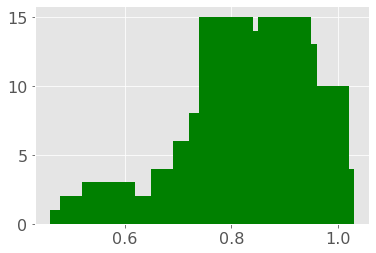

In [156]:
plt.bar(counter_prob.keys(), counter_prob.values(), width=0.1, color='g')

In [ ]:
#histogram


shapes 244 244


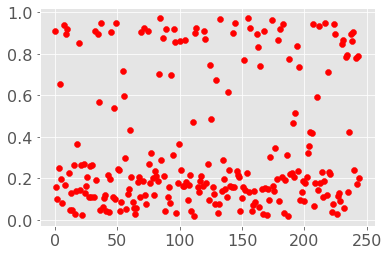

In [157]:
num_predictions = len(y_proba[:,0])
x = np.linspace(0, num_predictions, num=num_predictions)

print ('shapes {} {}'.format(len(x), num_predictions))
#y = x
fig, ax = plt.subplots()
ax.scatter(x, y_proba[:,0], color='red')

# split into red and blue 

In [158]:
x = np.linspace(0, 1, num=100)
# for each probility in y_proba, x = max proba and color is whether its 
# actually in the B or M col

pos_pred = y_proba[:,1]
neg_pred = y_proba[:,0]
pos_pred[:5]
# initially plot both
# aggregate by counts, in buckets of size 0.1
# fancy trick?  pivot, dict, first bucketize/bin

array([0.0913899 , 0.8402233 , 0.90149134, 0.7513306 , 0.34534928],
      dtype=float32)

y vs y_predictions look like [(0, 0.0913899), (0, 0.8402233), (1, 0.90149134), (1, 0.7513306), (0, 0.34534928), (0, 0.8020739), (1, 0.9195615), (0, 0.058739055), (1, 0.8335416), (0, 0.10498217), (0, 0.08019151), (1, 0.7744914), (1, 0.9505796), (1, 0.8689763), (1, 0.9508604)]


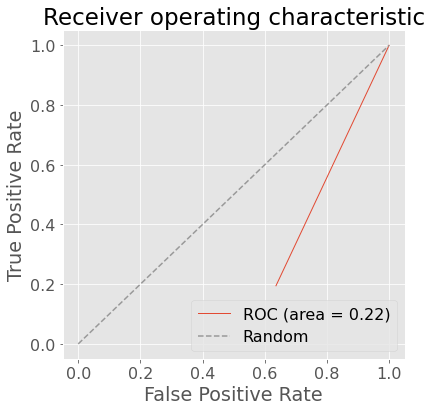

In [159]:
# ROC curve, use py files
plot_roc(X_holdout, y_holdout, cnn.model, 'roc_plot_test')

tensorflow.python.keras.engine.sequential.Sequential

In [35]:

features = ip.features
target = ip.tumor_class_vector
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .2, random_state=1)


In [12]:
cnn = CNN()
cnn.model = model

In [161]:

score = cnn.model.evaluate(X_holdout, y_holdout, verbose=1)

In [162]:
score

[0.5324775781787809, 0.7581967]

AttributeError: 'CNN' object has no attribute 'history'

In [48]:
plot_training_results(history, 10)

In [49]:
type(cnn.history)

tensorflow.python.keras.callbacks.History

In [45]:
cnn.fit(X_train, X_test, y_train, y_test)
cnn.load_and_featurize_data()
cnn.fit_model( batch_size=batch_size, epochs=nb_epoch, verbose=1, data_augmentation=True)

What do X_train, X_test, y_train, y_test look like (1610, 153, 234, 3) (403, 153, 234, 3) (1610,) (403,)
How many train ben/malig 1120 out of total 1610
How many test ben/malig 270 out of total 403
X_train shape: (1610, 153, 234, 3)
1610 train samples
403 test samples
Epoch 1/10
51/51 [==============================] - 289s 6s/step - accuracy: 0.3043 - loss: 0.8390 - batch: 25.0000 - size: 31.5686 - val_accuracy: 0.3542 - val_loss: 0.8085
Epoch 2/10
51/51 [==============================] - 297s 6s/step - accuracy: 0.3043 - loss: 0.8315 - batch: 25.0000 - size: 31.5686 - val_accuracy: 0.3542 - val_loss: 0.8028
Epoch 3/10
51/51 [==============================] - 296s 6s/step - accuracy: 0.3043 - loss: 0.8248 - batch: 25.0000 - size: 31.5686 - val_accuracy: 0.3542 - val_loss: 0.7972
Epoch 4/10
51/51 [==============================] - 251s 5s/step - accuracy: 0.3043 - loss: 0.8184 - batch: 25.0000 - size: 31.5686 - val_accuracy: 0.3542 - val_loss: 0.7918
Epoch 5/10
51/51 [=================

In [47]:
cnn.history

In [50]:
plot_training_results(history, 10)

In [51]:

def plot_training_results(history, epochs):
    if history is None:
        return
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

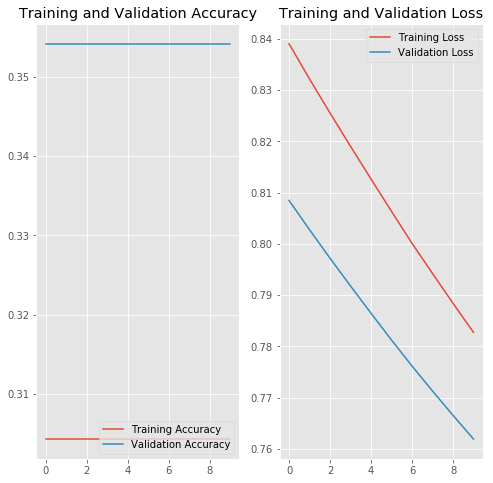

In [52]:
plot_training_results(cnn.history, 10)